In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from tensorflow import keras


In [98]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [99]:
start = '2010-01-01'
end = '2019-12-31'

df= data.DataReader('AAPL', 'yahoo', start, end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444383
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544688
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556004
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451722
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.938202
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.325798
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.298729
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.721893
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.245934


In [104]:
df=df.reset_index()

In [ ]:
df= df.drop(['Date', 'Adj Close'], axis=1)
df.head()

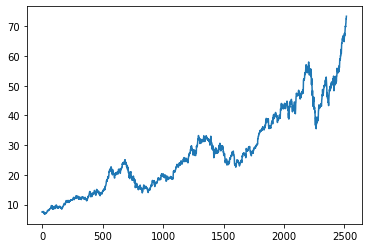

In [107]:
plt.plot(df.Close)

In [108]:
df

,level_0,index,High,Low,Open,Close,Volume
0,0,0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,1,1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,2,2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,3,3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,4,4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...,...,...
2512,2512,2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,2513,2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,2514,2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,2515,2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [109]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

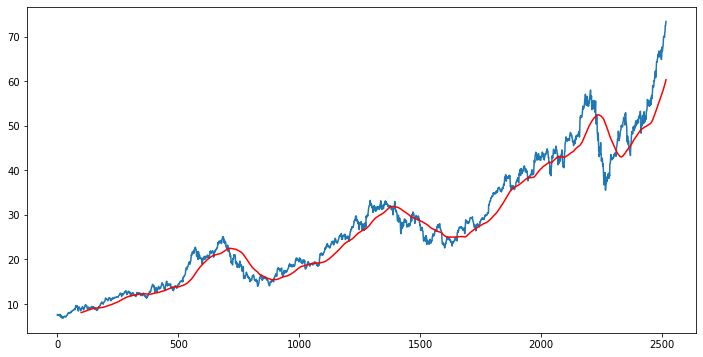

In [110]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [111]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

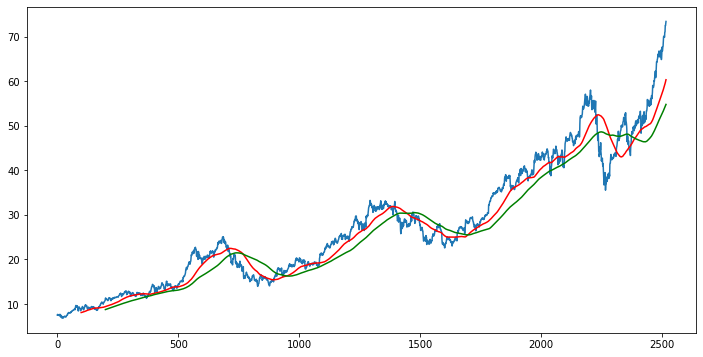

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2517, 5)

In [14]:
#abhi data ko training and testing me differ start

In [15]:
data_training= pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [16]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [17]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [28]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [20]:
data_training_array.shape

(1761, 1)

In [29]:
x_train=[]
y_train=[]


for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [22]:
x_train.shape

(1661, 100, 1)

In [31]:
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM 
from keras.models import Sequential


In [30]:
model=Sequential()

model.add(LSTM(units=50, activation = 'relu', return_sequences = True, 
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
               
               
model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

               
model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1))



In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [55]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [56]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [79]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'] )

# model.fit(x_train, y_train, epochs=20)
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
26/26 [==============================] - 24s 682ms/step - loss: 0.0506 - accuracy: 6.0205e-04 - val_loss: 4202.2295 - val_accuracy: 0.0000e+00
Epoch 2/50
26/26 [==============================] - 8s 322ms/step - loss: 0.0042 - accuracy: 6.0205e-04 - val_loss: 4217.3491 - val_accuracy: 0.0000e+00
Epoch 3/50
26/26 [==============================] - 8s 333ms/step - loss: 0.0019 - accuracy: 6.0205e-04 - val_loss: 4214.0908 - val_accuracy: 0.0000e+00
Epoch 4/50
26/26 [==============================] - 12s 447ms/step - loss: 0.0015 - accuracy: 6.0205e-04 - val_loss: 4215.3975 - val_accuracy: 0.0000e+00
Epoch 5/50
26/26 [==============================] - 8s 290ms/step - loss: 0.0014 - accuracy: 6.0205e-04 - val_loss: 4214.9170 - val_accuracy: 0.0000e+00
Epoch 6/50
26/26 [==============================] - 5s 194ms/step - loss: 0.0014 - accuracy: 6.0205e-04 - val_loss: 4215.2930 - val_accuracy: 0.0000e+00
Epoch 7/50
26/26 [==============================] - 5s 184ms/step - loss: 0.0014

In [59]:
model.save('kerasmodel.h5')

In [57]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [58]:
data_training.tail()

,Close
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001
1760,29.190001


In [60]:
past_100_days=data_training.tail(100)

In [61]:
final_df=past_100_days.append(data_testing, ignore_index=True)

In [62]:
final_df.head()


,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [63]:
input_data.shape

(856, 1)

In [ ]:
#these are maybe right 

In [64]:
y_predicted = model.predict(x_test)

In [65]:
y_predicted.shape

(756, 1)

In [66]:
y_test


array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [67]:
y_predicted

array([[0.07747468],
       [0.07859583],
       [0.0792705 ],
       [0.0795759 ],
       [0.07958513],
       [0.07947769],
       [0.07955271],
       [0.08005825],
       [0.0810117 ],
       [0.08240488],
       [0.08402462],
       [0.08565778],
       [0.08731934],
       [0.08895265],
       [0.09045503],
       [0.0918    ],
       [0.09297739],
       [0.0939604 ],
       [0.09505913],
       [0.09634172],
       [0.09776022],
       [0.0991698 ],
       [0.10042348],
       [0.10269987],
       [0.10613203],
       [0.11054105],
       [0.11573418],
       [0.12152654],
       [0.12761778],
       [0.133688  ],
       [0.13934219],
       [0.14453572],
       [0.14948544],
       [0.15422907],
       [0.15861669],
       [0.16257991],
       [0.16622867],
       [0.16960733],
       [0.172539  ],
       [0.1749753 ],
       [0.17696416],
       [0.17855185],
       [0.180369  ],
       [0.18232119],
       [0.18446194],
       [0.18658288],
       [0.18857451],
       [0.190

In [68]:
scaler.scale_

AttributeError: 'MinMaxScaler' object has no attribute 'scale_'

In [69]:
scale_factor = 1/0.00694915
y_predicted = y_predicted*scale_factor
y_test= y_test*scale_factor

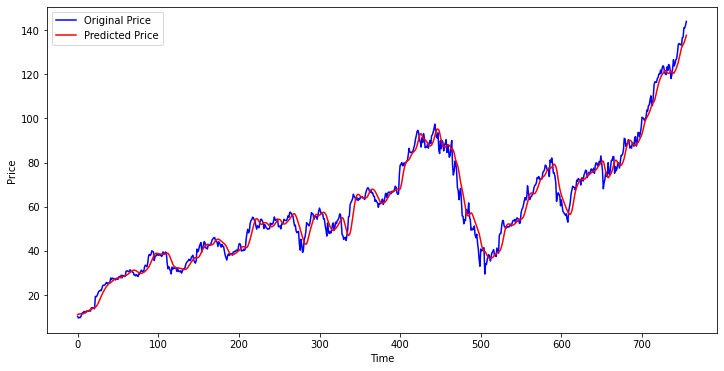

In [70]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [117]:

from keras.models import load_model

model = load_model('kerasmodel.h5')
scores = list(model.evaluate(x_test, y_predicted))

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

24/24 [==============================] - 5s 165ms/step - loss: 4139.8984


TypeError: 'float' object is not iterable